In [2]:
import os
import sys

# 引入本地模块
# 获得父目录路径
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

# 铭刻高级用法

## 1. 计算手续费

In [6]:
from common.inscribe import inscribe_after_tx

priv = "483d7ad79fead399d6097bc82888681297ab453cf75e18e0d36a1b3673ca249e"

[tx_hex, vsize, txid ] = inscribe_after_tx(
  "06f2b7e9e9556b827d4dd3a515010d9f066b8f1d9eacc2a8af9493a47cd3e8b3",
  0,
  1000,
  priv,
  2540170,
  'tb1pfywwjgdmskq4gjc55mehzt8u6a29mjslwl5avdphfyvs0grtgwrs4c768e',
)

print(tx_hex)
print(vsize)

fee = vsize * 300
print(fee)

02000000000101b3e8d37ca49394afa8c2ac9e1d8f6b069f0d0115a5d34d7d826b55e9e9b7f2060000000000ffffffff012202000000000000225120491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b43870340985fd73223ec59e9353a3b203c6bab9a3a386c3498aedd1ddfe9189c8a750493459463aa72d18c3f3798ab9c5b5d9bf598609fa42534a552ae799533630f19095420a0a5facd1bab3d71fdec1506e1e5f96f8097212361968cef3adab30f2a26f3baac0063036f7264010118746578742f706c61696e3b636861727365743d7574662d38000e323534303137302e6269746d61706821c0a0a5facd1bab3d71fdec1506e1e5f96f8097212361968cef3adab30f2a26f3ba00000000
141
42300


## 2. 连续铭刻

In [19]:
from common.inscribe import generate_random_private_key, set_network

set_network('testnet')

priv1 = generate_random_private_key()
print(priv1)

2543a8bc1b2119888728ea144c29ed11ba8b23e4e4aa25f613f6ee6dc54e549f


In [20]:
priv1 = "2543a8bc1b2119888728ea144c29ed11ba8b23e4e4aa25f613f6ee6dc54e549f"

In [21]:
blocknumber1 = 2540353

In [22]:
from common.inscribe import get_bitmap_inscription_address


# print(priv)
address1 = get_bitmap_inscription_address(priv1, blocknumber1)

From Taproot script address tb1p6n4jps3lmlzlgx5dkphjw2ptn5hvff6xagrf82s3a9e723urqagqntnly5


In [23]:
print(address1)

tb1p6n4jps3lmlzlgx5dkphjw2ptn5hvff6xagrf82s3a9e723urqagqntnly5


In [24]:
priv2 = generate_random_private_key()
print(priv2)

b5e470f38cfea7a9fecfaddbfa16d6085d81a186e557e549700373493f19e911


In [25]:
priv2 = "b5e470f38cfea7a9fecfaddbfa16d6085d81a186e557e549700373493f19e911"

In [26]:
blocknumber2 = 2540354

In [27]:
address2 = get_bitmap_inscription_address(priv2, blocknumber2)

From Taproot script address tb1pu7ulkyut84k2f55m3sv6akx2cvnytsde7wwnj5exew9sd60x9ggq8x5ljl


In [28]:
print(address2)

tb1pu7ulkyut84k2f55m3sv6akx2cvnytsde7wwnj5exew9sd60x9ggq8x5ljl


In [30]:
from common.inscribe import inscribe_and_send_after_tx
from client.blockchain_client import broadcast_tx

[tx_hex, vsize, txid] = inscribe_and_send_after_tx(
  txid="06b112ca04501002486e0134510a0d4cfb469f769724706c25c3a394c3e1c01a",
  vout=0,
  amount=2000,
  fee=200,
  private=priv1,
  block_nummber=blocknumber1,
  receive_address="tb1pfywwjgdmskq4gjc55mehzt8u6a29mjslwl5avdphfyvs0grtgwrs4c768e",
  send_address=address2,
)

print(vsize)
response = broadcast_tx(tx_hex)
print(response.status_code)
print(response.text)



From Taproot script address tb1p6n4jps3lmlzlgx5dkphjw2ptn5hvff6xagrf82s3a9e723urqagqntnly5
[{'amount': 546, 'script_pubkey': ['OP_1', '491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b4387']}, {'amount': 1254, 'script_pubkey': ['OP_1', 'e7b9fb138b3d6ca4d29b8c19aed8cac32645c1b9f39d395326cb8b06e9e62a10']}]
184
response: <Response [200]>
200
2a891e871c1d4d2514195f403cbb879da874a0d2c7924c1ee477367c905237da


transaction: https://mempool.space/testnet/tx/2a891e871c1d4d2514195f403cbb879da874a0d2c7924c1ee477367c905237da

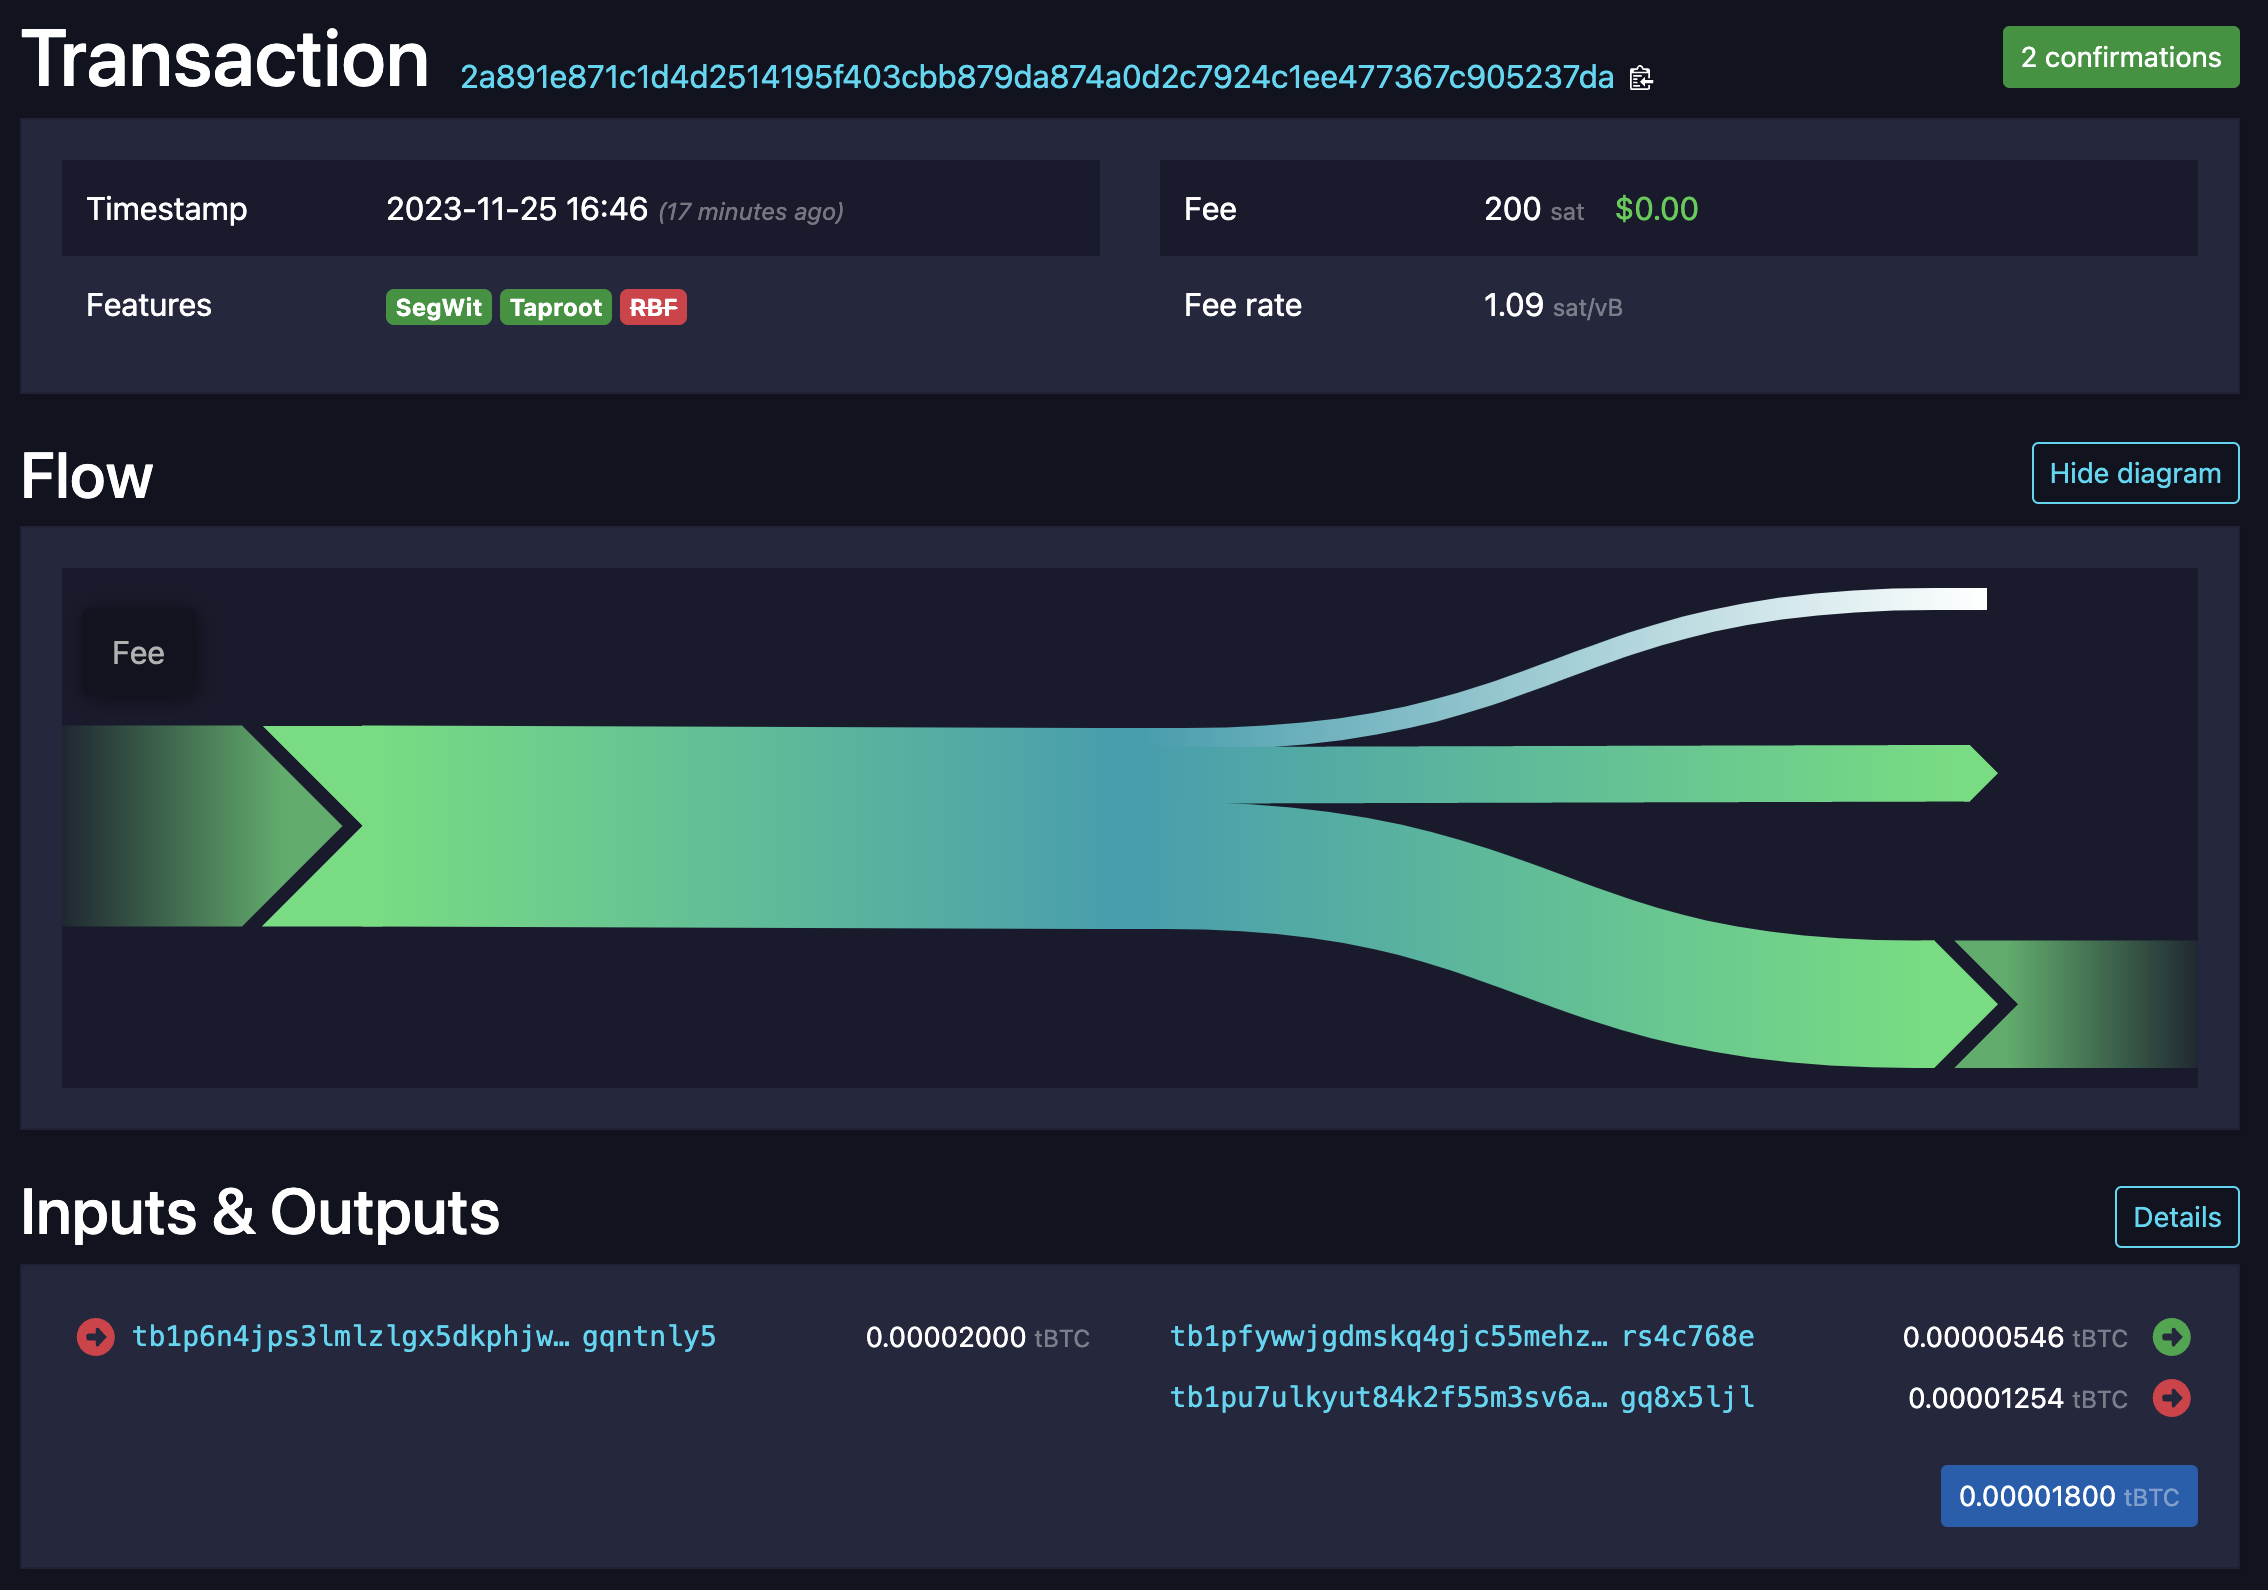

In [32]:
from common.inscribe import inscribe_and_send_after_tx
from client.blockchain_client import broadcast_tx

[tx_hex, vsize, txid] = inscribe_and_send_after_tx(
  txid="2a891e871c1d4d2514195f403cbb879da874a0d2c7924c1ee477367c905237da",
  vout=1,
  amount=1254,
  fee=200,
  private=priv2,
  block_nummber=blocknumber2,
  receive_address="tb1pfywwjgdmskq4gjc55mehzt8u6a29mjslwl5avdphfyvs0grtgwrs4c768e",
  send_address="tb1pacxdwxtyu3h48wg2g37hd8g2l7nnrekpklwgxv4glnvxsl876jdqa4chp3",
)
print(vsize)
response = broadcast_tx(tx_hex)
print(response.status_code)
print(response.text)



From Taproot script address tb1pu7ulkyut84k2f55m3sv6akx2cvnytsde7wwnj5exew9sd60x9ggq8x5ljl
[{'amount': 546, 'script_pubkey': ['OP_1', '491ce921bb8581544b14a6f3712cfcd7545dca1f77e9d63437491907a06b4387']}, {'amount': 508, 'script_pubkey': ['OP_1', 'ee0cd71964e46f53b90a447d769d0affa731e6c1b7dc8332a8fcd8687cfed49a']}]
184
response: <Response [200]>
200
870f09737535270662daa868a3d41905bec379e71fc7d9cc755e27893c893d3c


transaction: https://mempool.space/testnet/tx/870f09737535270662daa868a3d41905bec379e71fc7d9cc755e27893c893d3c

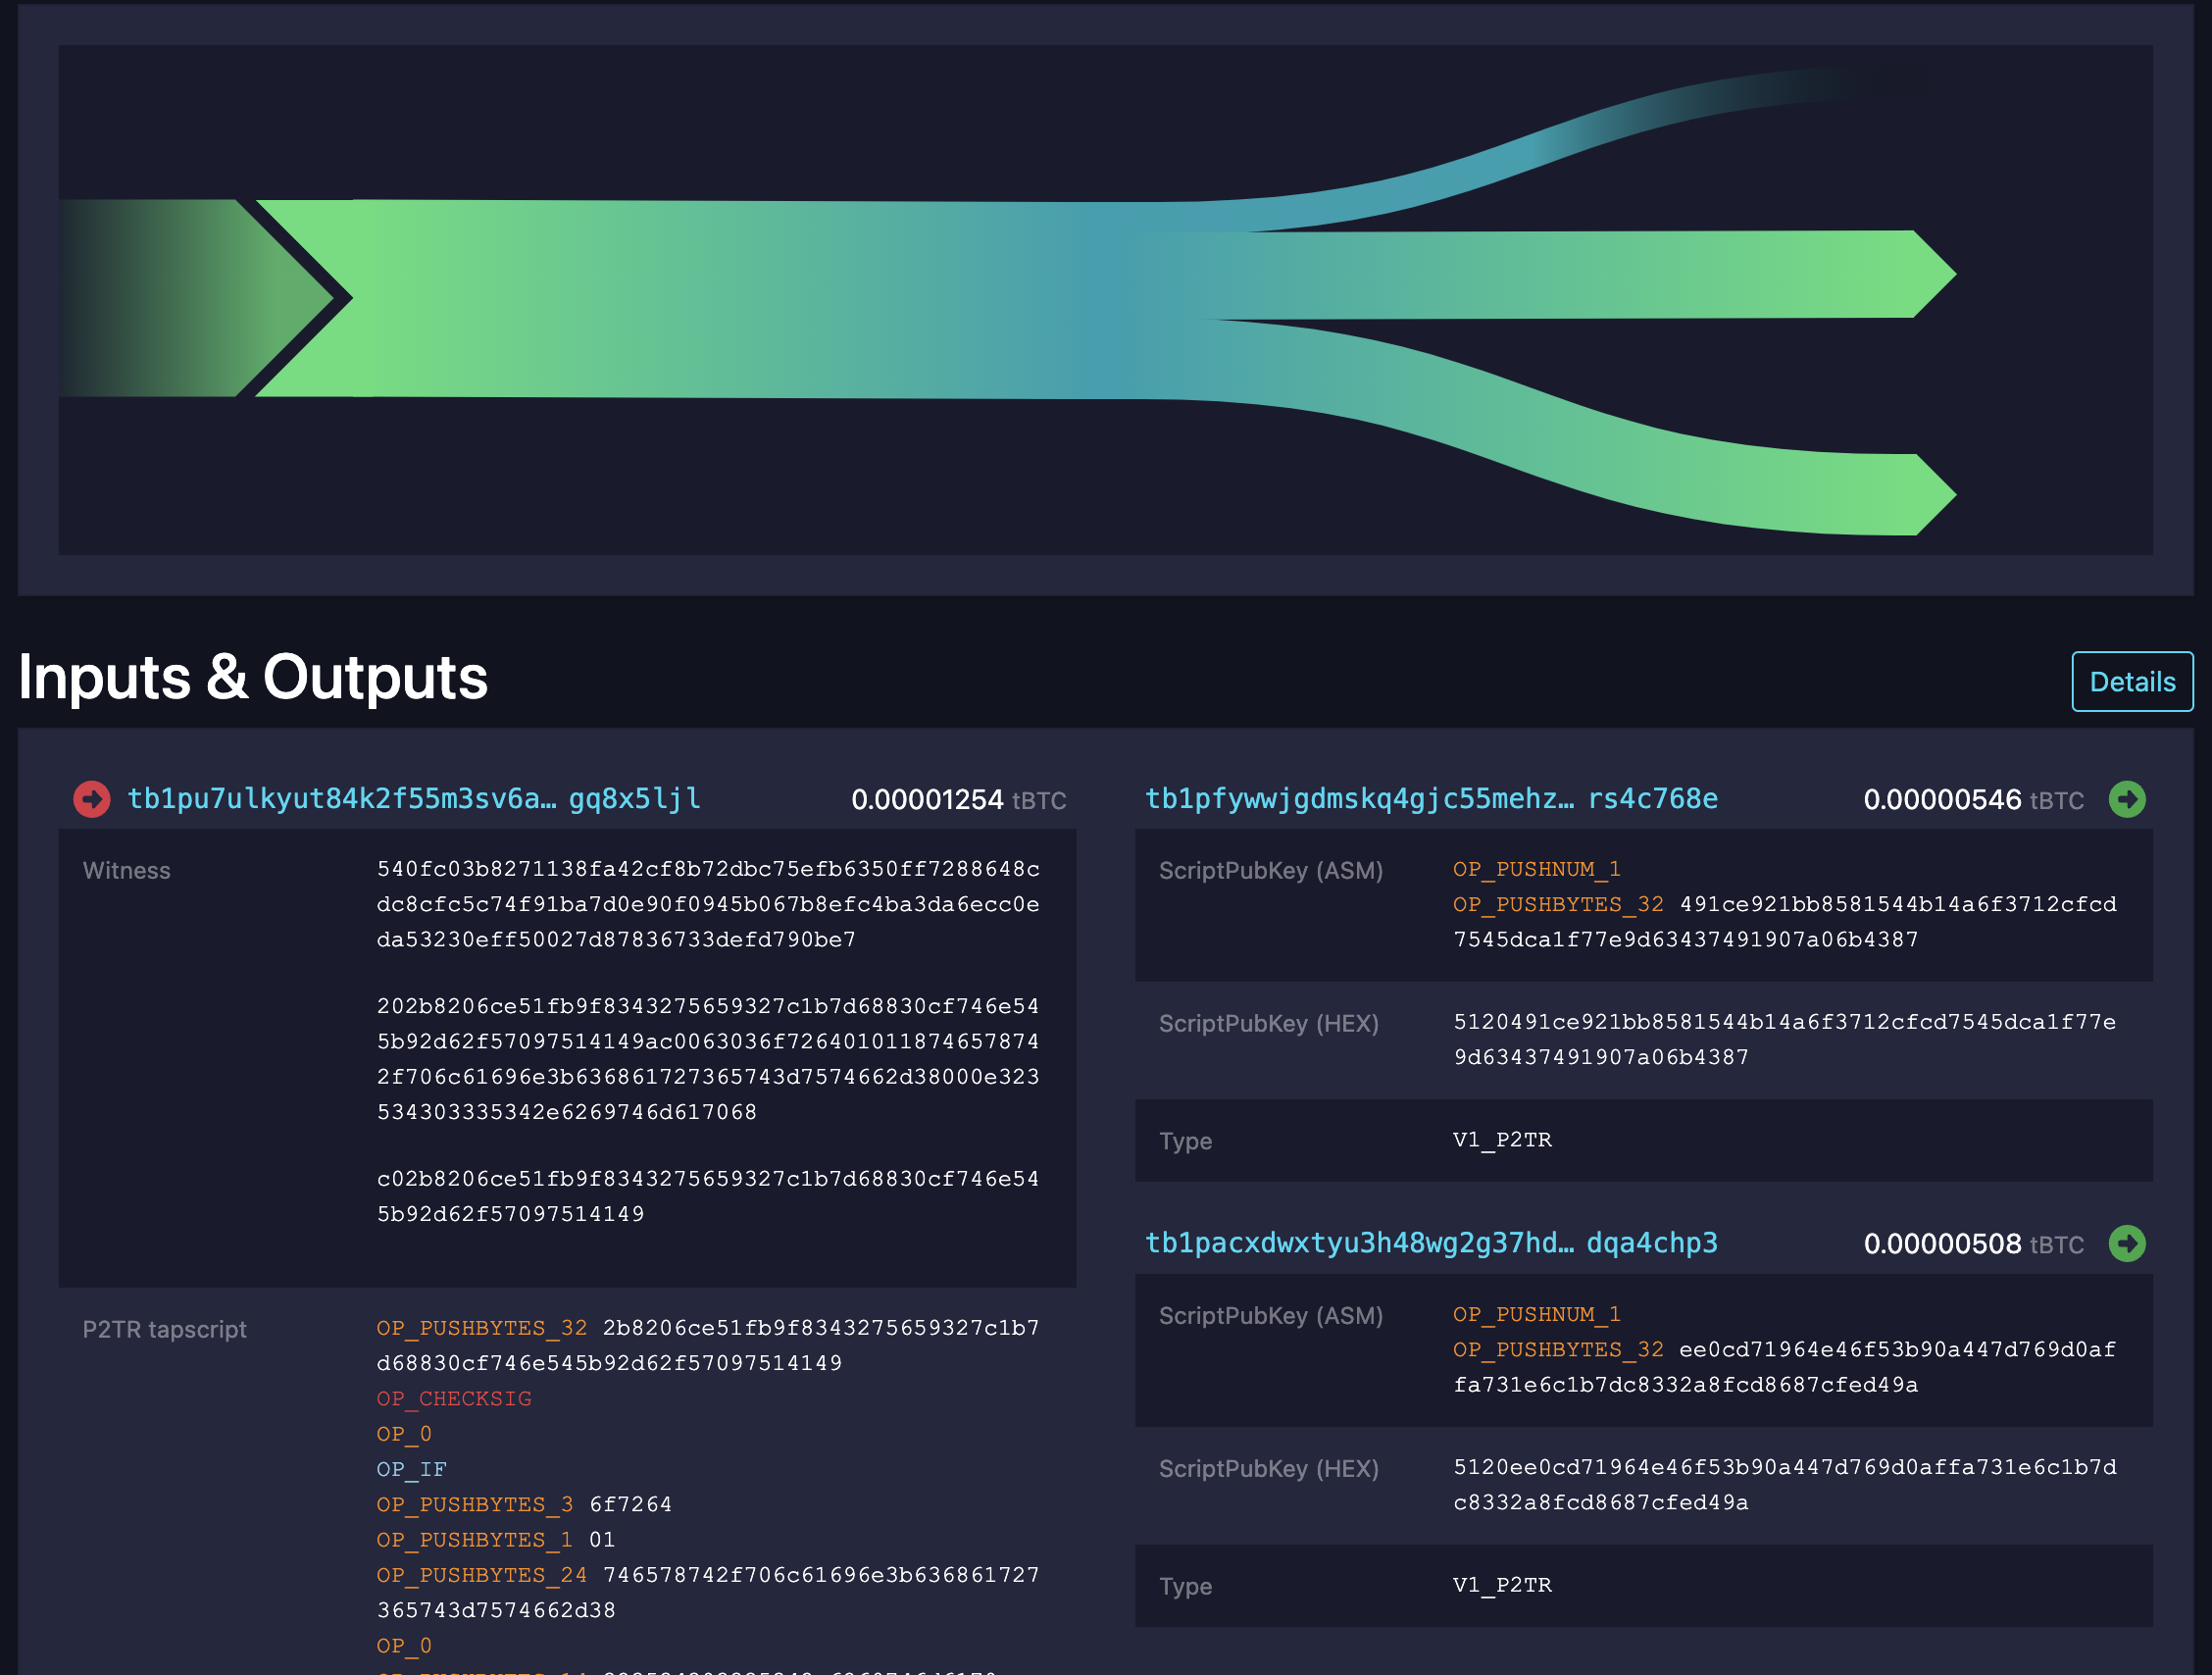

## 3. 铭刻失败

有时候会发现把钱打到铭刻地址后，无法成功发出交易。这时候需要使用私钥直接把钱转回来

In [15]:
from common.inscribe import refund_from_inscription_tx, set_network
from client.blockchain_client import broadcast_tx

set_network('testnet')

[txhex, vsize, txid] = refund_from_inscription_tx(
  txid="c225844d3ffe73336d9d2737d44f162e0bc2e88bca6d10adf6942179832c7087",
  vout=0,
  amount=1200,
  fee=156,
  private=priv1,
  block_nummber=blocknumber1,
  receive_address="tb1pacxdwxtyu3h48wg2g37hd8g2l7nnrekpklwgxv4glnvxsl876jdqa4chp3",
)
print('vsize:',vsize)
response = broadcast_tx(txhex)
print(response.status_code)
print(response.text)

[{'amount': 1044, 'script_pubkey': ['OP_1', 'ee0cd71964e46f53b90a447d769d0affa731e6c1b7dc8332a8fcd8687cfed49a']}]
111
response: <Response [200]>
200
33be63b4a55aaf1f7e858a41297918f089d6192288f9e1c3efaf2d07c5324a72
